<a href="https://colab.research.google.com/github/vartikatrao/SVM/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads (1).csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
dataset= dataset.drop(columns=['User ID'])
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
dataset.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
dataset.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [ ]:
dataset.groupby(['Age'])['EstimatedSalary'].mean()

Age
18     66400.000000
19     46000.000000
20     61714.285714
21     61000.000000
22     48800.000000
23     51166.666667
24     49111.111111
25     65166.666667
26     53500.000000
27     67615.384615
28     69416.666667
29     69100.000000
30     76000.000000
31     62454.545455
32     95666.666667
33     65000.000000
34     68333.333333
35     61812.500000
36     83250.000000
37     79400.000000
38     69153.846154
39     82800.000000
40     72200.000000
41     63562.500000
42     78937.500000
43    124666.666667
44     89000.000000
45     51000.000000
46     61750.000000
47     60071.428571
48     80285.714286
49     67400.000000
50     47000.000000
51    101000.000000
52     91833.333333
53     87000.000000
54     77000.000000
55     98000.000000
56     99000.000000
57     63000.000000
58     74666.666667
59     84428.571429
60     65285.714286
Name: EstimatedSalary, dtype: float64

In [ ]:
dataset.groupby(['Gender'])['EstimatedSalary'].mean()

Gender
Female    71759.803922
Male      67642.857143
Name: EstimatedSalary, dtype: float64

In [ ]:
dataset.groupby(['Gender'])['Purchased'].value_counts()

Gender  Purchased
Female  0            127
        1             77
Male    0            130
        1             66
Name: Purchased, dtype: int64

In [ ]:
dataset= dataset.drop(columns=['Gender'])
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


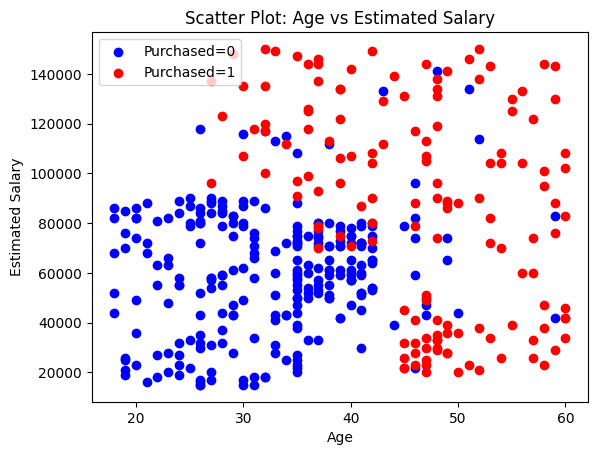

In [ ]:
import matplotlib.pyplot as plt

# Separate the data based on the 'Purchased' values
purchased_0 = dataset[dataset['Purchased'] == 0]
purchased_1 = dataset[dataset['Purchased'] == 1]

# Plotting the scatter plot
plt.scatter(purchased_0['Age'], purchased_0['EstimatedSalary'], color='blue', label='Purchased=0')
plt.scatter(purchased_1['Age'], purchased_1['EstimatedSalary'], color='red', label='Purchased=1')

# Adding labels and title to the plot
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Scatter Plot: Age vs Estimated Salary')

# Adding legend
plt.legend()

# Display the plot
plt.show()


In [ ]:
X = dataset[['Age', 'EstimatedSalary']]
y = dataset['Purchased']
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)


In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

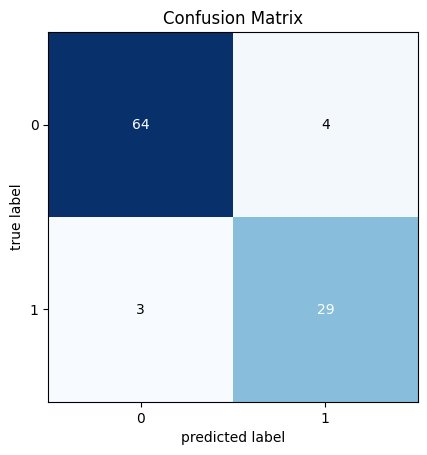

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print('Accuracy of the model:', accuracy_score(y_test,y_pred)*100, '%' )

Accuracy of the model: 93.0 %


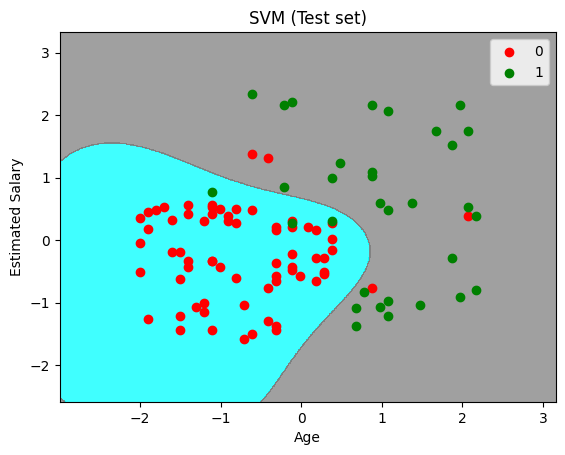

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('cyan', 'grey')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
X_new = pd.DataFrame({'Age': [19], 'EstimatedSalary': [190000]})


print("New data:")
print(X_new)
X_new = sc.transform(X_new)
y_pred = classifier.predict(X_new)

predicted_value = "Purchased" if y_pred==1 else "Not Purchased"

print("The predicted value is:", predicted_value)

New data:
   Age  EstimatedSalary
0   19           190000
The predicted value is: Purchased
